In [93]:
import numpy as np
import matplotlib.pyplot as plt
import random

from keras.datasets import mnist
from keras.models import Sequential  

from keras.layers.core import Dense, Dropout, Activation 
from keras.utils import np_utils                         

## Loading Training Data

The MNIST dataset is conveniently bundled within Keras, and we can easily analyze some of its features in Python.

In [94]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


Using matplotlib, we can plot some sample images from the training set directly into this Colab Notebook.

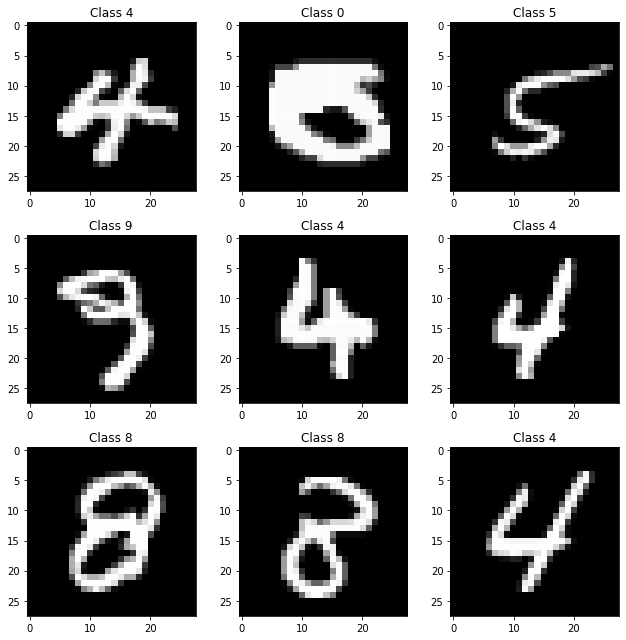

In [95]:
plt.rcParams['figure.figsize'] = (9,9)

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

Let's examine a single digit a little closer, and print out the array representing the last digit.

In [96]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
      
matprint(X_train[num])

0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  112  248  46  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   47  234  249  51  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0   16  109    0    0    0    0    0    0    0  205  254  103   0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0  124  240   15    0    0    0    0    0  107  249  221   28   0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0   4

Each pixel is an 8-bit integer from 0-255. 0 is full black, while 255 is full white. This what we call a single-channel pixel. It's called monochrome.

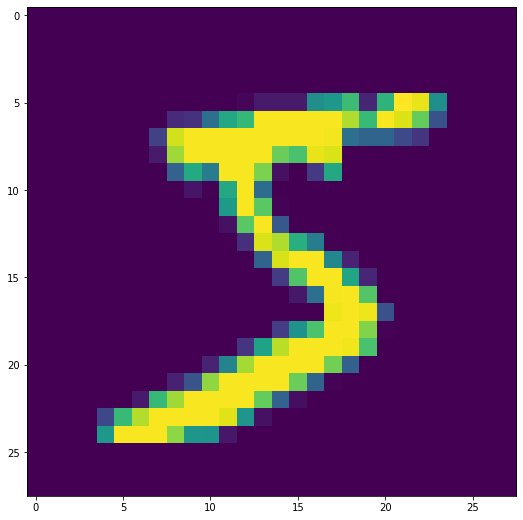

In [97]:
import cv2
import matplotlib.pyplot as plt

def display(image):
    plt.imshow(image)
    plt.show()
    
sample  = X_train[0].reshape((28,28))
display(sample)

In [98]:
X_train = X_train.reshape((-1,28,28,1))

In [99]:
X_test = X_test.reshape((-1,28,28,1))

In [100]:
X_train = X_train/255
print(np.max(X_train))

1.0


In [101]:
X_test = X_test/255
print(np.max(X_train))

1.0


In [102]:
print(X_train.shape)

(60000, 28, 28, 1)


In [103]:
print(X_test.shape)

(10000, 28, 28, 1)


In [104]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

In [105]:
y_train.shape

(60000, 10)

In [106]:
y_test = to_categorical(y_test)

In [107]:
y_test.shape

(10000, 10)

# Building a network

In [108]:
import keras
from keras.models import Sequential
from keras.layers import Dense,ReLU,Conv2D,MaxPooling2D,Activation,Flatten,Dropout,BatchNormalization

In [109]:
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),padding='same',input_shape=(28,28,1),name='0'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',name='1'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',name='2'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='same',name='3'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.29))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dropout(0.21))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
0 (Conv2D)                   (None, 28, 28, 16)        160       
_________________________________________________________________
activation_16 (Activation)   (None, 28, 28, 16)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
1 (Conv2D)                   (None, 14, 14, 32)        4640      
_________________________________________________________________
activation_17 (Activation)   (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 14, 14, 32)      

In [122]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [120]:
history = model.fit(X_train,y_train,validation_split=0.02,epochs = 10,verbose=1)

Epoch 1/10
1838/1838 [==============================] - 67s 36ms/step - loss: 0.0297 - accuracy: 0.9928 - val_loss: 0.0198 - val_accuracy: 0.9975
Epoch 2/10
1838/1838 [==============================] - 67s 36ms/step - loss: 0.0288 - accuracy: 0.9926 - val_loss: 0.0180 - val_accuracy: 0.9975
Epoch 3/10
1838/1838 [==============================] - 67s 36ms/step - loss: 0.0260 - accuracy: 0.9933 - val_loss: 0.0249 - val_accuracy: 0.9967
Epoch 4/10
1838/1838 [==============================] - 67s 37ms/step - loss: 0.0270 - accuracy: 0.9927 - val_loss: 0.0380 - val_accuracy: 0.9967
Epoch 5/10
1838/1838 [==============================] - 67s 36ms/step - loss: 0.0293 - accuracy: 0.9935 - val_loss: 0.0269 - val_accuracy: 0.9967
Epoch 6/10
1838/1838 [==============================] - 68s 37ms/step - loss: 0.0222 - accuracy: 0.9941 - val_loss: 0.0285 - val_accuracy: 0.9983
Epoch 7/10
1838/1838 [==============================] - 68s 37ms/step - loss: 0.0245 - accuracy: 0.9936 - val_loss: 0.0455 -

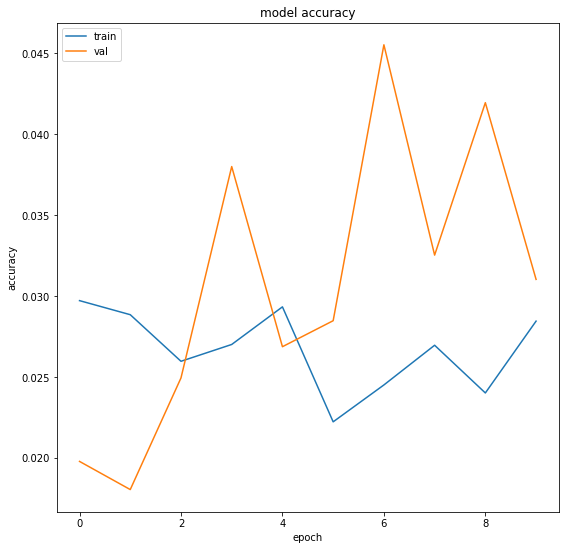

In [123]:
model.save('model.h5')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


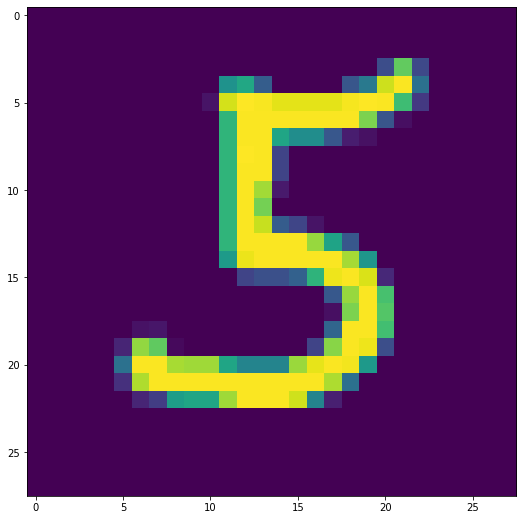

5


In [118]:
def get_result(image):
    # image should be 28x28x1 with [0-1] values
    images = np.array([image])
    res = list(model.predict(images)[0])
    mx = max(res)
    return res.index(mx)
idx = 956
sample = X_train[idx]
print(y_test[idx])
display(sample.reshape(28,28))
print(get_result(sample))

In [124]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 4s 11ms/step - loss: 0.0439 - accuracy: 0.9939
Test score: 0.043932534754276276
Test accuracy: 0.9939000010490417
